In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
# Load the dataset
try:
    data = pd.read_csv('/content/drive/MyDrive/PlanSante/FoodContents.csv')
except FileNotFoundError:
    from google.colab import files
    print("Please upload the FoodContents.csv file")
    uploaded = files.upload()
    data = pd.read_csv('FoodContents.csv')

# Step 1: Check original dataset size
print(f"Original dataset size: {data.shape[0]}")

# Select relevant features for prediction
features = ['protein_g', 'carb_g', 'fat_g', 'freesugar_g', 'fibre_g',
            'sodium_mg', 'potassium_mg', 'calcium_mg']

# Check for missing values
print("Missing values:\n", data[features + ['energy_kcal']].isnull().sum())

# Remove rows with missing values
data_cleaned = data.dropna(subset=features + ['energy_kcal'])

# Step 2: Check dataset size after cleaning
print(f"Dataset size after cleaning: {data_cleaned.shape[0]}")

# Prepare the data
X = data_cleaned[features]
y = data_cleaned['energy_kcal']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Check training and test set sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Original dataset size: 1014
Missing values:
 protein_g       0
carb_g          0
fat_g           0
freesugar_g     0
fibre_g         0
sodium_mg       0
potassium_mg    0
calcium_mg      0
energy_kcal     0
dtype: int64
Dataset size after cleaning: 1014
Training set size: 811
Test set size: 203


In [26]:
# Select relevant features for prediction
features = ['protein_g', 'carb_g', 'fat_g', 'freesugar_g', 'fibre_g',
            'sodium_mg', 'potassium_mg', 'calcium_mg']

In [27]:
# Check for missing values
print("Missing values:\n", data[features + ['energy_kcal']].isnull().sum())

Missing values:
 protein_g       0
carb_g          0
fat_g           0
freesugar_g     0
fibre_g         0
sodium_mg       0
potassium_mg    0
calcium_mg      0
energy_kcal     0
dtype: int64


In [28]:
# Remove rows with missing values if any
data_cleaned = data.dropna(subset=features + ['energy_kcal'])

In [29]:
# Prepare the data
X = data_cleaned[features]
y = data_cleaned['energy_kcal']

In [30]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set random seed for reproducibility
tf.random.set_seed(42)

In [32]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train_scaled.shape[1],)),  # Explicitly define input shape
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [33]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']
)

In [34]:
# Training callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [35]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001
)

In [36]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 89526.7734 - mae: 231.6044 - val_loss: 96611.0781 - val_mae: 249.5701 - learning_rate: 0.0010
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88917.4688 - mae: 230.5191 - val_loss: 95447.5234 - val_mae: 247.6078 - learning_rate: 0.0010
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 87647.0234 - mae: 228.2984 - val_loss: 92911.6719 - val_mae: 243.3919 - learning_rate: 0.0010
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84996.2031 - mae: 223.7285 - val_loss: 87719.5234 - val_mae: 234.7697 - learning_rate: 0.0010
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79245.1406 - mae: 213.6110 - val_loss: 77936.2188 - val_mae: 218.6003 - learning_rate: 0.0010
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69247.9062 - mae: 196.6854 - val_loss: 61985.5156 - val_mae: 190.8863 - learning_rate: 0.0010
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53116.8984 - mae: 167.

In [37]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 115.1096 - mae: 7.4025
Test Loss: 138.22222900390625
Test MAE: 7.618452548980713


In [38]:
def predict_calories(food_name):
    # Find the food item in the dataset (case-insensitive)
    food_data = data_cleaned[data_cleaned['food_name'].str.lower() == food_name.lower()]

    if food_data.empty:
        print(f"Food item '{food_name}' not found in the dataset.")
        return None

    # Prepare the features (convert to DataFrame to retain feature names)
    food_features = food_data[features]

    # Scale the features
    food_features_scaled = scaler.transform(food_features)

    # Predict calories
    predicted_calories = model.predict(food_features_scaled)[0][0]

    return predicted_calories

In [39]:
# Example usage
print("\nExample Predictions:")
example_foods = ['Hot tea (Garam Chai)', 'Instant coffee', 'Espreso coffee', 'Iced tea']
for food in example_foods:
    calories = predict_calories(food)
    if calories is not None:
        actual_calories = data_cleaned[data_cleaned['food_name'] == food]['energy_kcal'].values[0]
        print(f"{food}: Predicted {calories:.2f} kcal (Actual: {actual_calories:.2f} kcal)")


Example Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Hot tea (Garam Chai): Predicted 32.88 kcal (Actual: 16.14 kcal)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Instant coffee: Predicted 33.93 kcal (Actual: 23.16 kcal)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Espreso coffee: Predicted 56.11 kcal (Actual: 51.54 kcal)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Iced tea: Predicted 31.20 kcal (Actual: 10.34 kcal)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


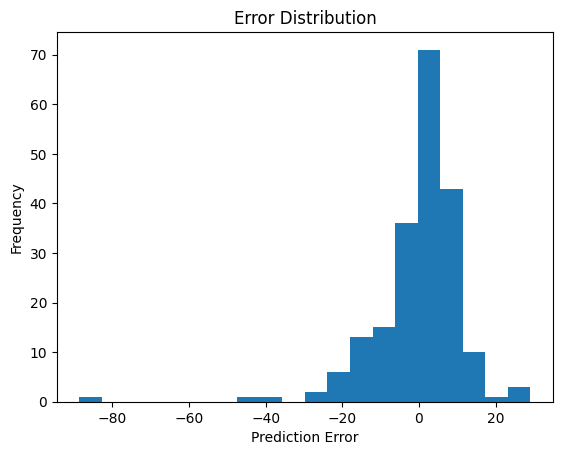

In [40]:
import matplotlib.pyplot as plt

# Generate predictions and calculate errors
predictions = model.predict(X_test_scaled)
errors = y_test - predictions.flatten()

# Plot the error distribution
plt.hist(errors, bins=20)
plt.title("Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

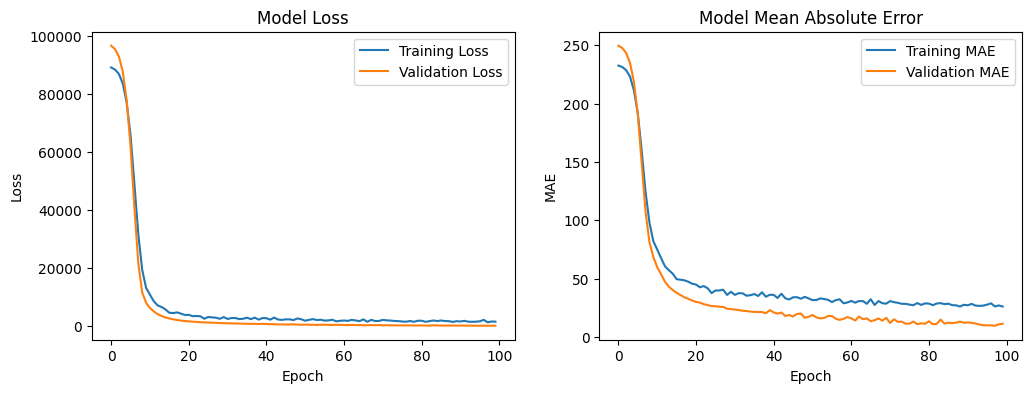

In [41]:
# Optional: Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

In [42]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>